# 0 Import Dataset from kaggle

In [ ]:
! pip install -q kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download arnavjain1/glaucoma-datasets/G1020/Images_Cropped/img

100% 5.54G/5.55G [01:12<00:00, 52.4MB/s]
100% 5.55G/5.55G [01:12<00:00, 82.5MB/s]


In [ ]:
! unzip /content/glaucoma-datasets.zip

Streaming output truncated to the last 5000 lines.
  inflating: REFUGE/test/Masks_Cropped/T0207.png  
  inflating: REFUGE/test/Masks_Cropped/T0208.png  
  inflating: REFUGE/test/Masks_Cropped/T0209.png  
  inflating: REFUGE/test/Masks_Cropped/T0210.png  
  inflating: REFUGE/test/Masks_Cropped/T0211.png  
  inflating: REFUGE/test/Masks_Cropped/T0212.png  
  inflating: REFUGE/test/Masks_Cropped/T0213.png  
  inflating: REFUGE/test/Masks_Cropped/T0214.png  
  inflating: REFUGE/test/Masks_Cropped/T0215.png  
  inflating: REFUGE/test/Masks_Cropped/T0216.png  
  inflating: REFUGE/test/Masks_Cropped/T0217.png  
  inflating: REFUGE/test/Masks_Cropped/T0218.png  
  inflating: REFUGE/test/Masks_Cropped/T0219.png  
  inflating: REFUGE/test/Masks_Cropped/T0220.png  
  inflating: REFUGE/test/Masks_Cropped/T0221.png  
  inflating: REFUGE/test/Masks_Cropped/T0222.png  
  inflating: REFUGE/test/Masks_Cropped/T0223.png  
  inflating: REFUGE/test/Masks_Cropped/T0224.png  
  inflating: REFUGE/test/Masks_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!zip -r /content/drive/MyDrive/folder.zip /content/G1020/NerveRemoved_Images


updating: content/G1020/NerveRemoved_Images/ (stored 0%)
updating: content/G1020/NerveRemoved_Images/image_1874.jpg (deflated 7%)
updating: content/G1020/NerveRemoved_Images/image_2125.jpg (deflated 4%)
updating: content/G1020/NerveRemoved_Images/image_2936.jpg (deflated 5%)
updating: content/G1020/NerveRemoved_Images/image_1922.jpg (deflated 6%)
updating: content/G1020/NerveRemoved_Images/image_2030.jpg (deflated 4%)
updating: content/G1020/NerveRemoved_Images/image_2300.jpg (deflated 3%)
updating: content/G1020/NerveRemoved_Images/image_1599.jpg (deflated 4%)
updating: content/G1020/NerveRemoved_Images/image_936.jpg (deflated 5%)
updating: content/G1020/NerveRemoved_Images/image_791.jpg (deflated 5%)
updating: content/G1020/NerveRemoved_Images/image_2805.jpg (deflated 4%)
updating: content/G1020/NerveRemoved_Images/image_3168.jpg (deflated 3%)
updating: content/G1020/NerveRemoved_Images/image_1303.jpg (deflated 5%)
updating: content/G1020/NerveRemoved_Images/image_3022.jpg (deflated 

In [ ]:
import shutil
shutil.move("/content/drive/MyDrive/folder.zip", "/content/folder.zip")


'/content/folder.zip'

In [ ]:
#Finalizing dataset by making two subfolders negetive
# and positive and saving appropriate images into them


import os
import csv
import shutil

# Provide the paths for the CSV file, source folder, and destination folder
csv_file_path = '/content/G1020/G1020.csv'
source_folder_path = '/content/G1020/NerveRemoved_Images'
destination_folder_path = '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020'

# Create the destination subfolders
os.makedirs(os.path.join(destination_folder_path, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(destination_folder_path, 'glaucoma'), exist_ok=True)

# Read the CSV file
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if present
    for row in reader:
        image_filename = row[0]
        class_label = int(row[1])

        # Determine the appropriate subfolder based on the class label
        if class_label == 0:
            subfolder = 'healthy'
        elif class_label == 1:
            subfolder = 'glaucoma'
        else:
            continue  # Skip if the class label is neither 0 nor 1

        # Move the image file to the corresponding subfolder in the destination folder
        source_image_path = os.path.join(source_folder_path, image_filename)
        destination_image_path = os.path.join(destination_folder_path, subfolder, image_filename)
        shutil.move(source_image_path, destination_image_path)


# 2 Image Preprocessing

**1 Splitting Folders into Train Test Val**

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders # or import splitfolders
input_folder = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020"
output = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_1" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.80, .0, .20))  #train val test

Copying files: 1020 files [00:10, 99.11 files/s] 


In [ ]:
import os

# Define the folder path
folder_path = '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020/healthy'

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Count the number of image files in the folder
image_count = sum(1 for file in file_list if file.endswith(('.jpg', '.jpeg', '.png', '.gif')))

# Print the image count
print(f"Number of images in the folder: {image_count}")


Number of images in the folder: 724


In [ ]:
from PIL import Image
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/dataset/G1020/negetive/image_0.jpg'
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)

# Check the range of values in the array
min_value = np.min(image_array)
max_value = np.max(image_array)

# Determine if the image is normalized
is_normalized = (min_value >= 0 and max_value <= 1)

# Print the result
if is_normalized:
    print("Image values are normalized (0 to 1).")
else:
    print("Image values are not normalized (0 to 255).")


Image values are not normalized (0 to 255).


**2 Applying Normalization, Stationary Wavelet Transformation on Sample Image**

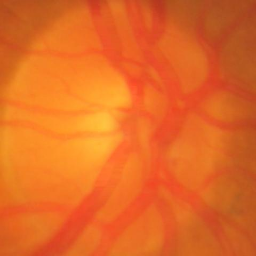

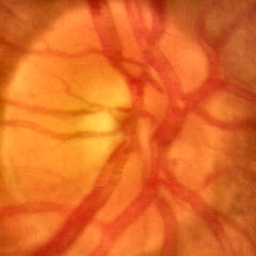

In [ ]:
import cv2
import numpy as np
import pywt
from google.colab.patches import cv2_imshow

def normalization(image):
    Imax = np.max(image)
    Imin = np.min(image)
    return (image - Imin) / (Imax - Imin)

# Path to the input image
image_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/dataset/G1020_1(Train_Test_Split)/train/negative/image_0.jpg"
# Load image
image = cv2.imread(image_path)

# Check if image is already square
if image.shape[0] != image.shape[1]:
    # Crop image to square with side length of the previous width
    shorter_side = min(image.shape[0], image.shape[1])
    image = image[:shorter_side, :shorter_side]

# Resize the image to 256x256
image = cv2.resize(image, (256, 256))

# Convert image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)


# Convert image back to BGR color space
processed_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)

# Convert image to floating-point representation
processed_image = processed_image.astype(np.float64) / 255.0

# Normalize image
normalized_image = normalization(processed_image)

# Apply Stationary Wavelet Transform (SWT) on each channel
channel_coeffs = []
for channel in range(3):
    channel_coeffs.append(pywt.swt2(normalized_image[:, :, channel], 'haar', level=3))

# Reconstruct the image from modified coefficients
reconstructed_image = np.zeros_like(normalized_image)
for channel in range(3):
    channel_coeffs_level3 = channel_coeffs[channel]
    channel_reconstructed = pywt.iswt2(channel_coeffs_level3, 'haar')
    reconstructed_image[:, :, channel] = channel_reconstructed

# Convert image back to 8-bit representation
reconstructed_image = (reconstructed_image * 255).astype(np.uint8)

# Display the original and processed image
cv2_imshow(image)
cv2_imshow(reconstructed_image)


In [ ]:
!pip install numpy
!pip install matplotlib
!pip install opencv-python
!pip install pywavelets


**3 Normalization and SWT on multiple images**

In [ ]:
#Normalizing and SWT on multiple images

import cv2
import numpy as np
import pywt
import os

def normalization(image):
    Imax = np.max(image)
    Imin = np.min(image)
    return (image - Imin) / (Imax - Imin)

def process_images(source_directory, destination_directory):
    # Get the list of images in the source directory
    image_files = [filename for filename in os.listdir(source_directory) if filename.endswith(".jpg")]
    total_images = len(image_files)

    # Iterate over the images in the source directory
    for idx, filename in enumerate(image_files):
        image_path = os.path.join(source_directory, filename)

        # Load image
        image = cv2.imread(image_path)

        # Check if image is already square
        if image.shape[0] == image.shape[1]:
            resized_image = cv2.resize(image, (256, 256))
        else:
            # Crop image to square with side length of the previous width
            shorter_side = min(image.shape[0], image.shape[1])
            cropped_image = image[:shorter_side, :shorter_side]

            # Resize the square image to 256x256
            resized_image = cv2.resize(cropped_image, (256, 256))

        # Convert image to floating-point representation
        image = resized_image.astype(np.float64) / 255.0

        # Normalize image
        normalized_image = normalization(image)

        # Apply Stationary Wavelet Transform (SWT) on each channel
        channel_coeffs = []
        for channel in range(3):
            channel_coeffs.append(pywt.swt2(normalized_image[:, :, channel], 'haar', level=3))

        # Reconstruct the image from modified coefficients
        reconstructed_image = np.zeros_like(normalized_image)
        for channel in range(3):
            channel_coeffs_level3 = channel_coeffs[channel]
            channel_reconstructed = pywt.iswt2(channel_coeffs_level3, 'haar')
            reconstructed_image[:, :, channel] = channel_reconstructed

        # Convert image back to 8-bit representation
        reconstructed_image = (reconstructed_image * 255).astype(np.uint8)

        # Save processed image to destination directory
        output_path = os.path.join(destination_directory, filename)
        cv2.imwrite(output_path, reconstructed_image)

        # Print progress
        print(f"Processed image {idx+1}/{total_images}")

# Source directory containing the input images
source_directory = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_1/train/healthy"

# Destination directory to save the processed images
destination_directory = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_2/negative"

# Process images from the source directory and save to the destination directory
process_images(source_directory, destination_directory)


Processed image 1/296
Processed image 2/296
Processed image 3/296
Processed image 4/296
Processed image 5/296
Processed image 6/296
Processed image 7/296
Processed image 8/296
Processed image 9/296
Processed image 10/296
Processed image 11/296
Processed image 12/296
Processed image 13/296
Processed image 14/296
Processed image 15/296
Processed image 16/296
Processed image 17/296
Processed image 18/296
Processed image 19/296
Processed image 20/296
Processed image 21/296
Processed image 22/296
Processed image 23/296
Processed image 24/296
Processed image 25/296
Processed image 26/296
Processed image 27/296
Processed image 28/296
Processed image 29/296
Processed image 30/296
Processed image 31/296
Processed image 32/296
Processed image 33/296
Processed image 34/296
Processed image 35/296
Processed image 36/296
Processed image 37/296
Processed image 38/296
Processed image 39/296
Processed image 40/296
Processed image 41/296
Processed image 42/296
Processed image 43/296
Processed image 44/2

**4 Image Augmentation**

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

# Input directory containing the original images
images_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/dataset/G1020_2(Train_Normalized_SWT)/negative/*.jpg"

# Destination directory to save the augmented images
augmented_path = '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/dataset/G1020_3(Train_Nomalized_SWT_Augmented)/negative'

# Create the destination directory if it doesn't exist
if not os.path.exists(augmented_path):
    os.makedirs(augmented_path)

# Create an instance of the ImageDataGenerator with desired augmentation options
data_generator = ImageDataGenerator(
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    rotation_range=90  # Rotate images randomly by 90 degrees
)

# Get the list of image file paths
image_files = sorted(glob.glob(images_path))

# Iterate through the images
for image_file in image_files:
    # Load the image
    image = Image.open(image_file)

    # Expand dimensions to have batch size of 1
    image = np.expand_dims(image, axis=0)

    # Generate augmented images
    augmented_images = data_generator.flow(image, batch_size=1, save_to_dir=augmented_path, save_prefix='aug_', save_format='jpg')

    # Specify the number of augmented images to generate (e.g., 3)
    num_augmented_images = 3
    for _ in range(num_augmented_images):
        augmented_image = augmented_images.next()

print("Image augmentation completed.")


Image augmentation completed.


In [ ]:
from numpy import fliplr , flipud , arange , asarray
from imutils import rotate_bound
from cv2 import imread , imwrite
from glob import glob
from scipy import ndimage
from matplotlib.image import imread,imsave

def image_affine_transform (image):
    height ,width , colors = image.shape
    transform = [[1,0,0],[0.5,1,0],[0,0,1]]
    return ndimage.affine_transform(image , transform ,offset = (0,-height//2 ,0),output_shape=(height , width+height //2 , colors))

def image_rotation(image,angle):
    rotated = rotate_bound(image, angle)
    return rotated

def h_flip(image):
    return fliplr(image)

def v_flip(image):
    return flipud(image)

images_path = '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_2/negative/*.jpg'
augmented_path ='/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_3.2/negative'

images=glob(images_path);

image_count =0
for image in images:
        image_number = 0

        img=imread(image)
        for angle in arange(15,20,5):
            image_name = image.replace(".jpg","")
            img_rotate = image_rotation(img,angle)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.jpg',img_rotate)
            img_hflip = h_flip(img)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.jpg',img_hflip)
            img_aff_trans =image_affine_transform(img)
            image_number += 1
            imsave(f'{augmented_path}/{os.path.basename(image_name)}aug{image_number}.jpg',img_aff_trans)
            image_count += 3
            #print(image_count)

print("Image augmentation completed.")



Image augmentation completed.


In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

# Input directory containing the original images
images_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_2/negative/*.jpg"

# Destination directory to save the augmented images
augmented_path = '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_3.1/negative'

# Create the destination directory if it doesn't exist
if not os.path.exists(augmented_path):
    os.makedirs(augmented_path)

# Create an instance of the ImageDataGenerator with desired augmentation options
data_generator = ImageDataGenerator(
    rotation_range=20,  # Rotate images randomly up to 20 degrees
    width_shift_range=0.2,  # Shift the width of images randomly up to 20% of the total width
    height_shift_range=0.2,  # Shift the height of images randomly up to 20% of the total height
    shear_range=0.2,  # Apply shear transformation randomly up to 20 degrees
    zoom_range=0.2,  # Zoom in/out randomly up to 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True  # Flip images vertically
)

# Get the list of image file paths
image_files = sorted(glob.glob(images_path))

# Iterate through the images
for image_file in image_files:
    # Load the image
    image = Image.open(image_file)

    # Expand dimensions to have batch size of 1
    image = np.expand_dims(image, axis=0)

    # Generate augmented images
    augmented_images = data_generator.flow(image, batch_size=1, save_to_dir=augmented_path, save_prefix='aug_', save_format='jpg')

    # Specify the number of augmented images to generate (e.g., 5)
    num_augmented_images = 3
    for _ in range(num_augmented_images):
        augmented_image = augmented_images.next()

print("Image augmentation completed.")


Image augmentation completed.


# 3 Feature Extraction + Principal Component Anaylysis

**VGG 16 Feature Extraction**

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path to the glaucoma dataset
dataset_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_2"
# Path to the destination folder to save the CSV file
destination_folder = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features"

# Create VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False)

# Get the number of features in the model
num_features = vgg16_model.output_shape[1]

# Initialize empty lists for features and labels
features = []
labels = []

# Mapping folder names to class labels
class_mapping = {"negative": 0, "positive": 1}

# Iterate through the glaucoma dataset
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path) and class_folder in class_mapping:
        class_label = class_mapping[class_folder]  # Get the class label from the mapping

        # Iterate through the images in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Load and preprocess the image
            img = Image.open(image_path)
            img = img.resize((224, 224))  # VGG16 input size
            img = np.array(img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)

            # Extract features using the VGG16 model
            features_vector = vgg16_model.predict(img).flatten()

            # Add features and label to the lists
            features.append(features_vector)
            labels.append(class_label)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Apply min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Retain 99% of the variance
features_pca = pca.fit_transform(features_scaled)

# Create the CSV file path
csv_file_path = os.path.join(destination_folder, "VGG16_Features.csv")

# Convert labels to integers
labels = labels.astype(int)

# Write features and labels to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['label'] + [f'feature_{i}' for i in range(features_pca.shape[1])])  # Write header row
    for i in range(len(features_pca)):
        writer.writerow([labels[i]] + list(features_pca[i]))  # Write feature row

print(f"Features extracted and saved to {csv_file_path}")

1/1 [==============================] - 0s 20ms/step
Features extracted and saved to /content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/VGG16_Features.csv


**Inception V3 Feature Extraction**

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Path to the glaucoma dataset
dataset_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_2"
# Path to the destination folder to save the CSV file
destination_folder = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features"

# Create InceptionV3 model
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False)

# Get the number of features in the model
num_features = inceptionv3_model.output_shape[1]

# Initialize empty lists for features and labels
features = []
labels = []

# Mapping folder names to class labels
class_mapping = {"negative": 0, "positive": 1}

# Iterate through the glaucoma dataset
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path) and class_folder in class_mapping:
        class_label = class_mapping[class_folder]  # Get the class label from the mapping

        # Iterate through the images in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Load and preprocess the image
            img = Image.open(image_path)
            img = img.resize((299, 299))  # InceptionV3 input size
            img = np.array(img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)

            # Extract features using the InceptionV3 model
            features_vector = inceptionv3_model.predict(img).flatten()

            # Add features and label to the lists
            features.append(features_vector)
            labels.append(class_label)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Apply min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Retain 99% of the variance
features_pca = pca.fit_transform(features_scaled)

# Create the CSV file path
csv_file_path = os.path.join(destination_folder, "InceptionV3_Features.csv")

# Convert labels to integers
labels = labels.astype(int)

# Write features and labels to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['label'] + [f'feature_{i}' for i in range(features_pca.shape[1])])  # Write header row
    for i in range(len(features_pca)):
        writer.writerow([labels[i]] + list(features_pca[i]))  # Write feature row

print(f"Features extracted and saved to {csv_file_path}")


1/1 [==============================] - 0s 29ms/step


KeyboardInterrupt: ignored

**Resnet50 Feature Extraction**

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Path to the glaucoma dataset
dataset_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_4.2/train"
# Path to the destination folder to save the CSV file
destination_folder = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features"

# Create ResNet50 model
resnet50_model = ResNet50(weights='imagenet', include_top=False)

# Get the number of features in the model
num_features = resnet50_model.output_shape[1]

# Initialize empty lists for features and labels
features = []
labels = []

# Mapping folder names to class labels
class_mapping = {"negative": 0, "positive": 1}

# Iterate through the glaucoma dataset
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path) and class_folder in class_mapping:
        class_label = class_mapping[class_folder]  # Get the class label from the mapping

        # Iterate through the images in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Load and preprocess the image
            img = Image.open(image_path)
            img = img.resize((224, 224))  # ResNet50 input size
            img = np.array(img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)

            # Extract features using the ResNet50 model
            features_vector = resnet50_model.predict(img).flatten()

            # Add features and label to the lists
            features.append(features_vector)
            labels.append(class_label)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Apply min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Retain 99% of the variance
features_pca = pca.fit_transform(features_scaled)

# Create the CSV file path
csv_file_path = os.path.join(destination_folder, "ResNet50_Features.csv")

# Convert labels to integers
labels = labels.astype(int)

# Write features and labels to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['label'] + [f'feature_{i}' for i in range(features_pca.shape[1])])  # Write header row
    for i in range(len(features_pca)):
        writer.writerow([labels[i]] + list(features_pca[i]))  # Write feature row

print(f"Features extracted and saved to {csv_file_path}")


1/1 [==============================] - 0s 39ms/step
Features extracted and saved to /content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/ResNet50_Features.csv


**Xception Feature Extraction**

In [ ]:
import os
import csv
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input

# Path to the glaucoma dataset
dataset_path = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/dataset/G1020_4.2/train"
# Path to the destination folder to save the CSV file
destination_folder = "/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features"

# Create Xception model
xception_model = Xception(weights='imagenet', include_top=False)

# Get the number of features in the model
num_features = xception_model.output_shape[1]

# Initialize empty lists for features and labels
features = []
labels = []

# Mapping folder names to class labels
class_mapping = {"negative": 0, "positive": 1}

# Iterate through the glaucoma dataset
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    if os.path.isdir(class_path) and class_folder in class_mapping:
        class_label = class_mapping[class_folder]  # Get the class label from the mapping

        # Iterate through the images in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Load and preprocess the image
            img = Image.open(image_path)
            img = img.resize((299, 299))  # Xception input size
            img = np.array(img)
            img = np.expand_dims(img, axis=0)
            img = preprocess_input(img)

            # Extract features using the Xception model
            features_vector = xception_model.predict(img).flatten()

            # Add features and label to the lists
            features.append(features_vector)
            labels.append(class_label)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Apply min-max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.99)  # Retain 99% of the variance
features_pca = pca.fit_transform(features_scaled)
del features_scaled
gc.collect()
del features
gc.collect()
# Create the CSV file path
csv_file_path = os.path.join(destination_folder, "Xception_Features.csv")

# Convert labels to integers
labels = labels.astype(int)

# Write features and labels to the CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['label'] + [f'feature_{i}' for i in range(features_pca.shape[1])])  # Write header row
    for i in range(len(features_pca)):
        writer.writerow([labels[i]] + list(features_pca[i]))  # Write feature row

print(f"Features extracted and saved to {csv_file_path}")


1/1 [==============================] - 0s 22ms/step
Features extracted and saved to /content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/Xception_Features.csv


**Dataset Feature Vector CSV File**

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/VGG16_Features.csv"


df= pd.read_csv(path)
X = df.iloc[:,1:]
Y = df.iloc[:, 0]

# Removing extra NAN values with 0
X = X.fillna(0)

# Converting X and Y to numpy arrays
X = X.to_numpy()
Y = Y.to_numpy()

# Combining Y label and X feature array
combined_array = np.column_stack((Y, X))

# Creating a DataFrame from the combined array
df = pd.DataFrame(combined_array)

df.iloc[:, 0] = df.iloc[:, 0].astype('int64')

df.to_csv(path, index=False, header= None)
df

<ipython-input-4-b5824a5d59ee>:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 0] = df.iloc[:, 0].astype('int64')


,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,1,0.863375,3.507072,0.392449,4.108048,0.921285,0.304609,-0.488807,-0.207959,-0.858411,...,-0.042774,0.061842,0.044355,-0.024608,-0.018609,-0.137049,0.016415,0.029736,0.042429,0.004951
1,1,-2.692965,-2.596252,-1.185620,0.138355,-1.132847,0.572864,-0.194124,0.407232,0.866716,...,-0.286271,-0.277797,-0.227402,0.055507,-0.412318,0.007037,-0.534013,-0.060292,-0.147454,0.088324
2,1,2.666447,0.783858,-2.057027,-2.073446,-0.281253,2.321021,4.193395,0.765069,-1.506405,...,0.001556,0.015509,-0.021341,-0.083326,0.100940,-0.105121,-0.040182,-0.000626,0.027042,0.106762
3,1,3.415659,0.617191,0.183829,0.753840,-0.518754,0.330984,0.272552,1.601543,-0.022704,...,-0.100230,0.030957,0.004762,-0.030271,-0.022753,0.109571,-0.033217,-0.030303,-0.021170,0.025122
4,1,-3.102502,1.838794,2.664729,-4.312652,2.321716,-0.433509,0.335174,0.796370,-0.328582,...,0.027275,0.021167,0.022248,0.053416,0.077475,0.013211,-0.046126,-0.023678,-0.140236,0.086989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0,-2.981472,0.068569,-1.834907,-0.973171,0.845865,-0.910298,-0.059150,-0.593333,0.960743,...,-0.089731,0.214606,0.231194,0.045441,-0.042236,-0.247136,0.226924,0.261233,-0.422134,0.142546
811,0,2.706396,-0.500734,-1.356462,-0.385802,1.612997,0.446624,-1.133722,-0.745300,-1.306663,...,-0.710733,-0.058276,-0.405565,0.125924,-0.504064,0.243273,-0.036703,0.665623,-0.072294,0.174897
812,0,3.685387,-0.202153,0.423643,0.969679,-0.804565,-0.475286,-0.439173,-0.766532,0.066599,...,0.178796,0.152582,0.154551,0.206836,-0.038082,-0.089182,-0.043860,-0.109286,-0.287066,0.045758
813,0,3.227695,-0.106103,0.431737,-0.321392,0.488996,-1.011925,0.017226,-0.257140,-1.321324,...,0.005474,-0.164094,-0.139363,0.015512,-0.040210,0.027158,-0.065299,-0.069089,-0.035798,-0.102133


In [ ]:
#MIN MAX Scaling function
def min_max_scale(X):
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 X = scaler.fit_transform(X)
 return X

#Function for Principal component analysis
#95% of variance
def pca_analysis(X):
 from sklearn.decomposition import PCA
 pca = PCA(n_components = 0.95)
 pca.fit(X)
 X = pca.transform(X)
 return X

In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/Xception_Features.csv"
chunksize = 200
tfr = pd.read_csv(path, chunksize=chunksize, iterator=True,header= None)
X_array =[]
Y_array= []
Y= pd.DataFrame(Y_array)
X = pd.DataFrame(X_array)

In [ ]:
#Doing min_max and pca on individual chunks of the large csv files
# and concactnating the result dataframes together
i=1
with tfr as reader:
    for chunk in reader:
        # x starts with 2nd column because first column is output and
        x = chunk.iloc[:,1:]
        #doing minmax scaling and pca on dataset chunk
        x = pd.DataFrame(x)
        #merging small x taken from chunk with large X
        X = pd.concat([X,x], axis=0, ignore_index=True)
        y = chunk.iloc[:, 0]
        Y = pd.concat([Y,y], axis=0, ignore_index=True)
        print("index_value")
        print(i)
        i=i+1

<ipython-input-3-9ad325bd075b>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

index_value
1
index_value
2
index_value
3
index_value
4


In [ ]:
import pandas as pd
path="/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/Xception_Features.csv"

# Removing extra NAN values with 0
X = X.fillna(0)

# Converting X and Y to numpy arrays
X = X.to_numpy()
Y = Y.to_numpy()

# Combining Y label and X feature array
combined_array = np.column_stack((Y, X))

# Creating a DataFrame from the combined array
df = pd.DataFrame(combined_array)

df.iloc[:, 0] = df.iloc[:, 0].astype('int64')

df.to_csv(path, index=False, header= None)
df

In [ ]:
#Doing min_max and pca on individual chunks of the large csv files
# and concactnating the result dataframes together
i=1
with tfr as reader:
    for chunk in reader:
        # x starts with 2nd column because first column is output and
        x = chunk.iloc[:,1:]
        #doing minmax scaling and pca on dataset chunk
        x = min_max_scale(x)
        x = pca_analysis(x)
        x = pd.DataFrame(x)
        #merging small x taken from chunk with large X
        X = pd.concat([X,x], axis=0, ignore_index=True)
        y = chunk.iloc[:, 0]
        Y = pd.concat([Y,y], axis=0, ignore_index=True)
        print("index_value")
        print(i)
        i=i+1

<ipython-input-10-78e60dfb5cac>:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

index_value
1


ValueError: ignored

In [ ]:

#Removing extra NAN values with 0
X = X.fillna(0)

#Joining X and Y
X= X.to_numpy()
Y= Y.to_numpy()
X = np.hstack((Y,X))
df= pd.DataFrame(X)
df.dtypes

In [ ]:
df

# 4 Classification

In [ ]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import gc

from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

def classify(path):

  #Part 1: Importing dataset and splitting it into X features and Y Output
  X_array =[]
  Y_array= []
  Y= pd.DataFrame(Y_array)
  X = pd.DataFrame(X_array)

  chunksize = 10
  tfr = pd.read_csv(path, chunksize=chunksize, iterator=True,header= None)
  i=1
  with tfr as reader:
      for chunk in reader:
          X = pd.concat([X,chunk.iloc[:,1:]], axis=0, ignore_index=True)
          Y = pd.concat([Y,chunk.iloc[:, 0]], axis=0, ignore_index=True)
          i=i+1


  #Part 2 Cross validation to split X and Y into training and testing
  from distutils.version import LooseVersion as Version
  from sklearn import __version__ as sklearn_version
  if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
  else:
    from sklearn.model_selection import train_test_split
  print(Version(sklearn_version))
  X_train, X_test, y_train, y_test = train_test_split(
      X, Y.values.ravel(), test_size=0.3, random_state=0
  )

  import os
  print("\nAccuracies of the given dataset: "+ os.path.basename(path))
  del X
  gc.collect()
  del Y
  gc.collect()



  #Part 3 CLassification using different classifiers

  #3.1) Perceptron model
  ppn = Perceptron(eta0=0.01, random_state=0)
  ppn.fit(X_train, y_train)
  y_pred1 = ppn.predict(X_test)
  print('Perceptron Model: %.2f' % accuracy_score(y_test, y_pred1))
  # roc curve for model
  from sklearn.calibration import CalibratedClassifierCV
  clf_isotonic = CalibratedClassifierCV(ppn, cv=10, method='isotonic')
  clf_isotonic.fit(X_train, y_train)

  pred_prob1 = clf_isotonic.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
  auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])




  #3.2) Logistic Regression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the test set result using
  # predict function under LogisticRegression
  y_pred2 = classifier.predict(X_test)
  print('Logistic Regression: %.2f' % accuracy_score(y_test, y_pred2))
  pred_prob2 = classifier.predict_proba(X_test)
  fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
  auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])


  #3.3) Support Vector Machines
  svclassifier = SVC(kernel='linear', probability=True)
  svclassifier.fit(X_train, y_train)
  y_pred3 = svclassifier.predict(X_test)
  print('Support Vector Machine: %.2f' % accuracy_score(y_test, y_pred3))
  pred_prob3 = svclassifier.predict_proba(X_test)
  fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
  auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])


  #3.4) Naive Bayes Classifier
  #Build a Gaussian Classifier
  model = GaussianNB()
  #Model training
  model.fit(X_train, y_train)
  y_pred4 = model.predict(X_test)
  print('Naive Bayes: %.2f' % accuracy_score(y_test, y_pred4))
  pred_prob4 = model.predict_proba(X_test)
  fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
  auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])


  #3.5) Decesion Tree Classifier
  #Create Decision Tree classifer object
  clf = DecisionTreeClassifier()
  #Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred5 = clf.predict(X_test)
  print('Decision Tree : %.2f' % accuracy_score(y_test, y_pred5))
  pred_prob5 = clf.predict_proba(X_test)
  fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
  auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

  #3.6)Random Forest Classifier
  # creating a RF classifier
  clf = RandomForestClassifier(n_estimators = 100)
  # Training the model on the training dataset
  # fit function is used to train the model using the training sets as parameters
  clf.fit(X_train, y_train)
  # performing predictions on the test dataset
  y_pred6 = clf.predict(X_test)
  print('Random Forest: %.2f' % accuracy_score(y_test, y_pred6))
  pred_prob6 = clf.predict_proba(X_test)
  fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
  auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])



  #3.7) KNN Classifier
  knn = KNeighborsClassifier(n_neighbors = 15) #Total samples 2958*0.7. square root of 2958*0.7 is 38.0712
  knn.fit(X_train, y_train)
  y_pred7 = knn.predict(X_test)
  #performing predictions on the test dataset
  print('KNN Classifier: %.2f' % accuracy_score(y_test, y_pred7))
  pred_prob7 = knn.predict_proba(X_test)
  fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
  auc_score7 = roc_auc_score(y_test, pred_prob7[:,1])

  #Part 4: Plotting Roc_AUC Curve
  # roc curve for tpr = fpr
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
  #plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Perceptron Model')
  plt.plot(fpr7, tpr7, linestyle='--',color='cyan', label='KNN Classifier')
  plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Support Vector Machine')
  plt.plot(fpr4, tpr4, linestyle='--',color='green', label='Naive Bayes')
  plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='Decision Tree ')
  plt.plot(fpr6, tpr6, linestyle='--',color='indigo', label='Random Forest')
  plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
  plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('ROC',dpi=300)
  plt.show();

  #Part5 Show AUC Scores of each classifier
  print("AUC Scores of given dataset: "+ os.path.basename(path))
  print('Peceptron AUC Score : %.2f' % auc_score1)
  print('Logistic Regression AUC Score : %.2f' % auc_score2)
  print('SVM AUC Score : %.2f' % auc_score3)
  print('Naive Bayes AUC Score : %.2f' % auc_score4)
  print('Decision Tree AUC Score : %.2f' % auc_score5)
  print('Random Forest AUC Score : %.2f' % auc_score6)
  print('KNN AUC Score : %.2f' % auc_score7)

  #Part6 Precision
  precision1 = precision_score(y_test, y_pred1)  # Calculate precision for Perceptron
  precision2 = precision_score(y_test, y_pred2)  # Calculate precision for Logistic Regression
  precision3 = precision_score(y_test, y_pred3)  # Calculate precision for Support Vector Machine
  precision4 = precision_score(y_test, y_pred4)  # Calculate precision for Naive Bayes
  precision5 = precision_score(y_test, y_pred5)  # Calculate precision for Decision Tree
  precision6 = precision_score(y_test, y_pred6)  # Calculate precision for Random Forest
  precision7 = precision_score(y_test, y_pred7)  # Calculate precision for KNN Classifier

  print("\nPrecision Scores of given dataset: "+ os.path.basename(path))
  print('Perceptron: %.2f' % precision1)
  print('Logistic Regression: %.2f' % precision2)
  print('Support Vector Machine: %.2f' % precision3)
  print('Naive Bayes: %.2f' % precision4)
  print('Decision Tree: %.2f' % precision5)
  print('Random Forest: %.2f' % precision6)
  print('KNN Classifier: %.2f' % precision7)


  #Part7: Recall
  recall1 = recall_score(y_test, y_pred1)  # Calculate recall for Perceptron
  recall2 = recall_score(y_test, y_pred2)  # Calculate recall for Logistic Regression
  recall3 = recall_score(y_test, y_pred3)  # Calculate recall for Support Vector Machine
  recall4 = recall_score(y_test, y_pred4)  # Calculate recall for Naive Bayes
  recall5 = recall_score(y_test, y_pred5)  # Calculate recall for Decision Tree
  recall6 = recall_score(y_test, y_pred6)  # Calculate recall for Random Forest
  recall7 = recall_score(y_test, y_pred7)  # Calculate recall for KNN Classifier

  print("\nRecall Scores of given dataset: "+ os.path.basename(path))
  print('Perceptron: %.2f' % recall1)
  print('Logistic Regression: %.2f' % recall2)
  print('Support Vector Machine: %.2f' % recall3)
  print('Naive Bayes: %.2f' % recall4)
  print('Decision Tree: %.2f' % recall5)
  print('Random Forest: %.2f' % recall6)
  print('KNN Classifier: %.2f' % recall7)



  # Part 8: F1 Score
  f1_score1 = f1_score(y_test, y_pred1)  # Calculate F1 score for Perceptron
  f1_score2 = f1_score(y_test, y_pred2)  # Calculate F1 score for Logistic Regression
  f1_score3 = f1_score(y_test, y_pred3)  # Calculate F1 score for Support Vector Machine
  f1_score4 = f1_score(y_test, y_pred4)  # Calculate F1 score for Naive Bayes
  f1_score5 = f1_score(y_test, y_pred5)  # Calculate F1 score for Decision Tree
  f1_score6 = f1_score(y_test, y_pred6)  # Calculate F1 score for Random Forest
  f1_score7 = f1_score(y_test, y_pred7)  # Calculate F1 score for KNN Classifier

  print("\nF1 Scores of given dataset: "+ os.path.basename(path))
  print('Perceptron: %.2f' % f1_score1)
  print('Logistic Regression: %.2f' % f1_score2)
  print('Support Vector Machine: %.2f' % f1_score3)
  print('Naive Bayes: %.2f' % f1_score4)
  print('Decision Tree: %.2f' % f1_score5)
  print('Random Forest: %.2f' % f1_score6)
  print('KNN Classifier: %.2f' % f1_score7)





<ipython-input-2-e6a6d94388e1>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-2-e6a6d94388e1>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: VGG16_Features.csv
Perceptron Model: 0.64
Logistic Regression: 0.68
Support Vector Machine: 0.64
Naive Bayes: 0.52
Decision Tree : 0.51
Random Forest: 0.73
KNN Classifier: 0.73


<ipython-input-2-e6a6d94388e1>:135: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


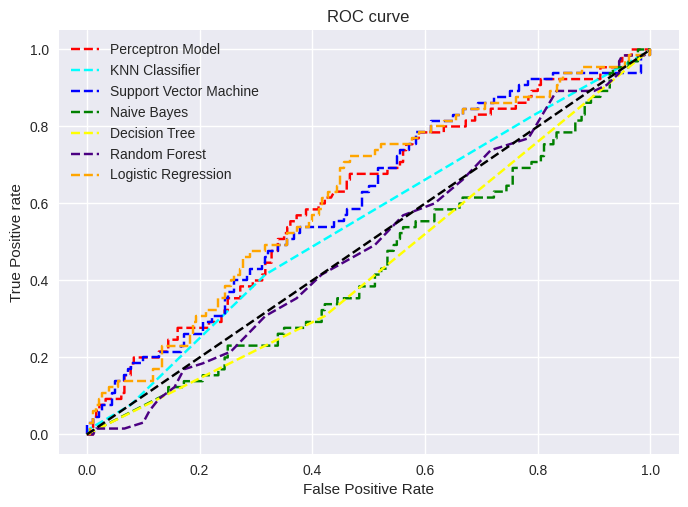

AUC Scores of given dataset: VGG16_Features.csv
Peceptron AUC Score : 0.61
Logistic Regression AUC Score : 0.62
SVM AUC Score : 0.61
Naive Bayes AUC Score : 0.44
Decision Tree AUC Score : 0.44
Random Forest AUC Score : 0.49
KNN AUC Score : 0.55

Precision Scores of given dataset: VGG16_Features.csv
Perceptron: 0.31
Logistic Regression: 0.34
Support Vector Machine: 0.35
Naive Bayes: 0.21
Decision Tree: 0.21
Random Forest: 0.00
KNN Classifier: 0.00

Recall Scores of given dataset: VGG16_Features.csv
Perceptron: 0.29
Logistic Regression: 0.23
Support Vector Machine: 0.40
Naive Bayes: 0.29
Decision Tree: 0.31
Random Forest: 0.00
KNN Classifier: 0.00

F1 Scores of given dataset: VGG16_Features.csv
Perceptron: 0.30
Logistic Regression: 0.28
Support Vector Machine: 0.37
Naive Bayes: 0.24
Decision Tree: 0.25
Random Forest: 0.00
KNN Classifier: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
path= '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/VGG16_Features.csv'
classify(path)

<ipython-input-2-e6a6d94388e1>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-2-e6a6d94388e1>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: ResNet50_Features.csv
Perceptron Model: 0.52
Logistic Regression: 0.67
Support Vector Machine: 0.64
Naive Bayes: 0.48
Decision Tree : 0.55
Random Forest: 0.73
KNN Classifier: 0.73


<ipython-input-2-e6a6d94388e1>:135: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


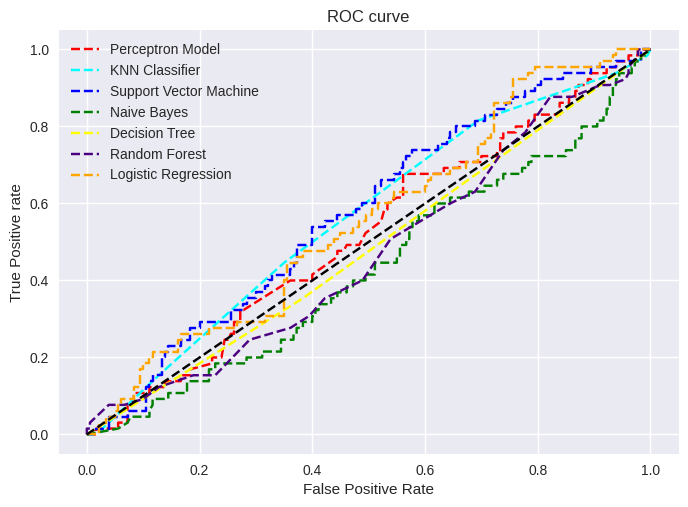

AUC Scores of given dataset: ResNet50_Features.csv
Peceptron AUC Score : 0.52
Logistic Regression AUC Score : 0.56
SVM AUC Score : 0.58
Naive Bayes AUC Score : 0.43
Decision Tree AUC Score : 0.49
Random Forest AUC Score : 0.47
KNN AUC Score : 0.57

Precision Scores of given dataset: ResNet50_Features.csv
Perceptron: 0.27
Logistic Regression: 0.33
Support Vector Machine: 0.31
Naive Bayes: 0.23
Decision Tree: 0.25
Random Forest: 0.00
KNN Classifier: 0.00

Recall Scores of given dataset: ResNet50_Features.csv
Perceptron: 0.49
Logistic Regression: 0.22
Support Vector Machine: 0.29
Naive Bayes: 0.40
Decision Tree: 0.35
Random Forest: 0.00
KNN Classifier: 0.00

F1 Scores of given dataset: ResNet50_Features.csv
Perceptron: 0.35
Logistic Regression: 0.26
Support Vector Machine: 0.30
Naive Bayes: 0.29
Decision Tree: 0.29
Random Forest: 0.00
KNN Classifier: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
path= '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/ResNet50_Features.csv'
classify(path)

<ipython-input-2-e6a6d94388e1>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-2-e6a6d94388e1>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: InceptionV3_Features.csv
Perceptron Model: 0.44
Logistic Regression: 0.65
Support Vector Machine: 0.63
Naive Bayes: 0.53
Decision Tree : 0.56
Random Forest: 0.73
KNN Classifier: 0.73


<ipython-input-2-e6a6d94388e1>:135: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


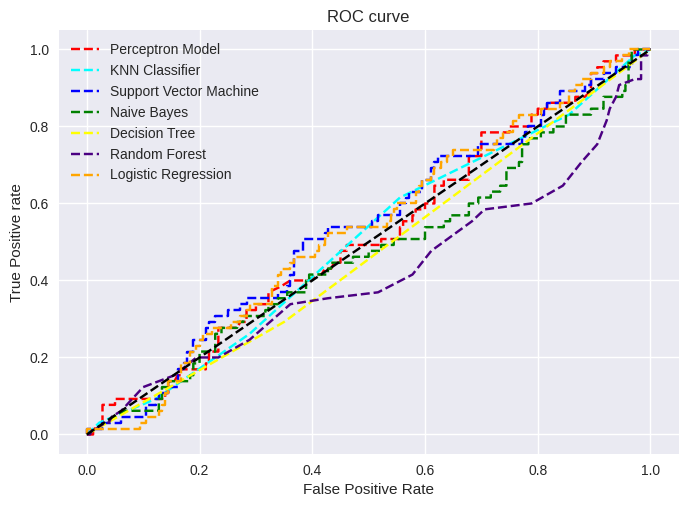

AUC Scores of given dataset: InceptionV3_Features.csv
Peceptron AUC Score : 0.51
Logistic Regression AUC Score : 0.53
SVM AUC Score : 0.53
Naive Bayes AUC Score : 0.47
Decision Tree AUC Score : 0.47
Random Forest AUC Score : 0.42
KNN AUC Score : 0.50

Precision Scores of given dataset: InceptionV3_Features.csv
Perceptron: 0.27
Logistic Regression: 0.30
Support Vector Machine: 0.31
Naive Bayes: 0.27
Decision Tree: 0.23
Random Forest: 0.00
KNN Classifier: 0.00

Recall Scores of given dataset: InceptionV3_Features.csv
Perceptron: 0.66
Logistic Regression: 0.23
Support Vector Machine: 0.31
Naive Bayes: 0.43
Decision Tree: 0.29
Random Forest: 0.00
KNN Classifier: 0.00

F1 Scores of given dataset: InceptionV3_Features.csv
Perceptron: 0.39
Logistic Regression: 0.26
Support Vector Machine: 0.31
Naive Bayes: 0.33
Decision Tree: 0.26
Random Forest: 0.00
KNN Classifier: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
path= '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/InceptionV3_Features.csv'
classify(path)

<ipython-input-2-e6a6d94388e1>:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':
<ipython-input-2-e6a6d94388e1>:26: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  print(Version(sklearn_version))


1.2.2

Accuracies of the given dataset: Xception_FeaturesPCA.csv
Perceptron Model: 0.45
Logistic Regression: 0.60
Support Vector Machine: 0.58
Naive Bayes: 0.48
Decision Tree : 0.58
Random Forest: 0.73
KNN Classifier: 0.73


<ipython-input-2-e6a6d94388e1>:135: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


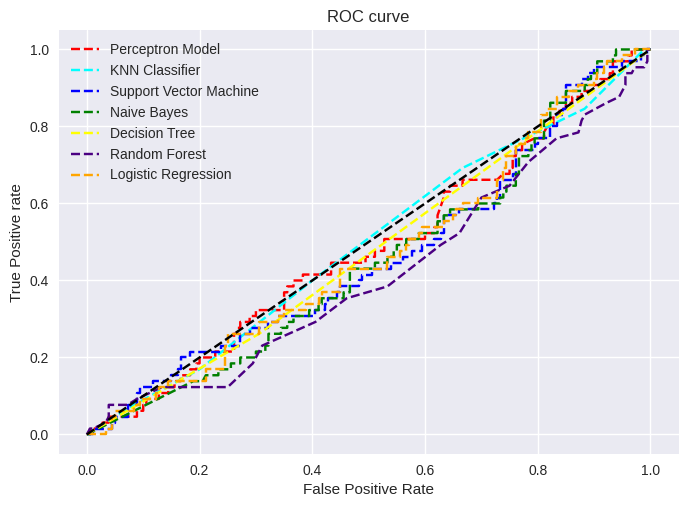

AUC Scores of given dataset: Xception_FeaturesPCA.csv
Peceptron AUC Score : 0.48
Logistic Regression AUC Score : 0.47
SVM AUC Score : 0.46
Naive Bayes AUC Score : 0.45
Decision Tree AUC Score : 0.48
Random Forest AUC Score : 0.42
KNN AUC Score : 0.50

Precision Scores of given dataset: Xception_FeaturesPCA.csv
Perceptron: 0.25
Logistic Regression: 0.21
Support Vector Machine: 0.25
Naive Bayes: 0.24
Decision Tree: 0.24
Random Forest: 0.00
KNN Classifier: 0.00

Recall Scores of given dataset: Xception_FeaturesPCA.csv
Perceptron: 0.55
Logistic Regression: 0.18
Support Vector Machine: 0.28
Naive Bayes: 0.43
Decision Tree: 0.26
Random Forest: 0.00
KNN Classifier: 0.00

F1 Scores of given dataset: Xception_FeaturesPCA.csv
Perceptron: 0.35
Logistic Regression: 0.20
Support Vector Machine: 0.26
Naive Bayes: 0.30
Decision Tree: 0.25
Random Forest: 0.00
KNN Classifier: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
path= '/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/Xception_FeaturesPCA.csv'
classify(path)

Accuracy: 0.6748466257668712
AUC: 0.5268115942028986
Precision: 0.38095238095238093
Recall: 0.16666666666666666
F1 Score: 0.2318840579710145


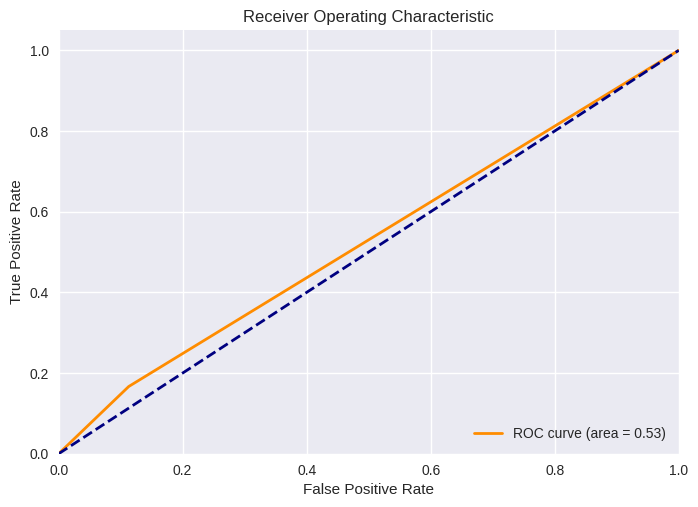

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

class ELM:
    def __init__(self, hidden_units):
        self.hidden_units = hidden_units

    def train(self, X, y):
        self.X = X
        self.y = y
        self.scaler = MinMaxScaler()
        X_scaled = self.scaler.fit_transform(self.X)
        self.input_weights = np.random.normal(size=(X_scaled.shape[1], self.hidden_units))
        hidden_layer = np.dot(X_scaled, self.input_weights)
        self.hidden_weights = np.linalg.pinv(hidden_layer) @ y

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        hidden_layer = np.dot(X_scaled, self.input_weights)
        output_layer = hidden_layer @ self.hidden_weights
        return np.where(output_layer >= 0.5, 1, 0)

# Load your dataset from CSV
path='/content/drive/MyDrive/Research_Projects/Early_Stage_Glaucoma Detection/G1020/features/InceptionV3_Features.csv'
dataset = np.genfromtxt(path, delimiter=',')
X = dataset[:, 1:]  # Features (columns 1 to end)
y = dataset[:, 0]   # Labels (column 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the ELM classifier
elm = ELM(hidden_units=100)  # Adjust the number of hidden units as needed
elm.train(X_train, y_train)

# Predict on the test set
y_pred = elm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

class ELM:
    def __init__(self, hidden_units):
        self.hidden_units = hidden_units

    def train(self, X, y):
        self.X = X
        self.y = y
        self.scaler = MinMaxScaler()
        X_scaled = self.scaler.fit_transform(self.X)
        self.input_weights = np.random.normal(size=(X_scaled.shape[1], self.hidden_units))
        hidden_layer = np.dot(X_scaled, self.input_weights)
        self.hidden_weights = np.linalg.pinv(hidden_layer) @ y

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        hidden_layer = np.dot(X_scaled, self.input_weights)
        output_layer = hidden_layer @ self.hidden_weights
        return np.where(output_layer >= 0.5, 1, 0)

def evaluate_elm_classifier(dataset_file):
    # Load dataset from CSV
    dataset = np.genfromtxt(dataset_file, delimiter=',')
    X = dataset[:, 1:]  # Features (columns 1 to end)
    y = dataset[:, 0]   # Labels (column 0)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the ELM classifier
    elm = ELM(hidden_units=100)  # Adjust the number of hidden units as needed
    elm.train(X_train, y_train)

    # Predict on the test set
    y_pred = elm.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc}")

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()




In [ ]:
# Usage example
dataset_path = 'your_dataset.csv'
evaluate_elm_classifier(dataset_path)